In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [2]:
E_commerce_data=pd.read_csv("C:\\Users\\User\\Documents\\PDS_PROJ_PIC\\ECOMMERCE.csv")

In [3]:
E_commerce_data

,Timestamp,Age,Gender,Highest Educational Qualification,Do you have any subscription on any E-Commerce site?,Which Types of product you prefer to buy from E-Commerce sites?,"On a scale of 0-5, how much does an overall product rating affect your purchase decision?",Do you generally find various alternatives for the same product in your affordable range?,"On a scale of 0-5 how much will you rate the customer service(Delivery process , after sale service, return policy)",Do you often receive damage products or different products which you have ordered?,Do you find any price difference between online and offline products?,On a scale of 0-5 how much will you prefer others for online shopping?,"On an average, yearly (approximately), how many products you bought from E-commerce sites on pre-Covid situation?","On an average, yearly (approximately), how many products you buy from E-commerce sites on post-Covid situation?",Which e-commerce sites you prefer for buying electronics product?,Which e-commerce sites you prefer for purchasing Garments?,Which e-commerce sites you prefer for buying grocery items?,Email Address,"Which e-commerce sites you prefer for buying educational products(books, Pens, paper etc.)?"
0,10-04-2021 16:24,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Online Price is greater,5,5,8,Amazon,Myntra,Big Basket,NaN,Amazon
1,10-05-2021 10:27,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Almost same,4,6,3,Flipkart,Myntra,Grofers,NaN,NaN
2,10-05-2021 11:15,21,Male,Graduate,Yes,"Electronics, Educational Materials, Others",4,Yes,5,Never,Online Price is greater,4,4,6,Amazon,Myntra,Big Basket,NaN,NaN
3,10-05-2021 11:26,21,Male,Graduate,Yes,"Electronics, Garments, Educational Materials",4,Yes,3,Never,Offline Price is greater,5,6,10,Amazon,Myntra,Grofers,NaN,NaN
4,10-05-2021 16:43,21,Male,Higher Secondary,No,"Electronics, Fashion Product",4,Yes,5,Never,Offline Price is greater,4,2,2,Flipkart,Myntra,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,10-07-2021 08:41,17,Male,Secondary,Yes,"Electronics, Garments",5,Yes,5,Never,Almost same,4,5,3,Amazon,Myntra,Prefer not to buy,NaN,NaN
108,10-07-2021 12:04,17,Female,Secondary,No,Electronics,1,Yes,3,Never,Almost same,3,0,0,Flipkart,Amazon,Big Basket,NaN,NaN
109,10/17/2021 18:20:50,19,Female,Higher Secondary,Yes,"Garments, Educational Materials, Fashion Product",3,Yes,3,Some times,Offline Price is greater,4,8,4,Flipkart,Amazon,Flipkart,NaN,NaN
110,10/21/2021 19:46:31,21,Male,Post Graduate and above,No,"Electronics, Educational Materials",3,Yes,4,Some times,Online Price is greater,5,12,5,Amazon,Amazon,Prefer not to buy,NaN,NaN


In [4]:
E_commerce_data = E_commerce_data.rename({"Highest Educational Qualification":"Qualification",
                                         "Which e-commerce sites you prefer for buying grocery items?":"Grocery_sites"}, axis = 1)

In [5]:
E_commerce_data

,Timestamp,Age,Gender,Qualification,Do you have any subscription on any E-Commerce site?,Which Types of product you prefer to buy from E-Commerce sites?,"On a scale of 0-5, how much does an overall product rating affect your purchase decision?",Do you generally find various alternatives for the same product in your affordable range?,"On a scale of 0-5 how much will you rate the customer service(Delivery process , after sale service, return policy)",Do you often receive damage products or different products which you have ordered?,Do you find any price difference between online and offline products?,On a scale of 0-5 how much will you prefer others for online shopping?,"On an average, yearly (approximately), how many products you bought from E-commerce sites on pre-Covid situation?","On an average, yearly (approximately), how many products you buy from E-commerce sites on post-Covid situation?",Which e-commerce sites you prefer for buying electronics product?,Which e-commerce sites you prefer for purchasing Garments?,Grocery_sites,Email Address,"Which e-commerce sites you prefer for buying educational products(books, Pens, paper etc.)?"
0,10-04-2021 16:24,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Online Price is greater,5,5,8,Amazon,Myntra,Big Basket,NaN,Amazon
1,10-05-2021 10:27,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Almost same,4,6,3,Flipkart,Myntra,Grofers,NaN,NaN
2,10-05-2021 11:15,21,Male,Graduate,Yes,"Electronics, Educational Materials, Others",4,Yes,5,Never,Online Price is greater,4,4,6,Amazon,Myntra,Big Basket,NaN,NaN
3,10-05-2021 11:26,21,Male,Graduate,Yes,"Electronics, Garments, Educational Materials",4,Yes,3,Never,Offline Price is greater,5,6,10,Amazon,Myntra,Grofers,NaN,NaN
4,10-05-2021 16:43,21,Male,Higher Secondary,No,"Electronics, Fashion Product",4,Yes,5,Never,Offline Price is greater,4,2,2,Flipkart,Myntra,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,10-07-2021 08:41,17,Male,Secondary,Yes,"Electronics, Garments",5,Yes,5,Never,Almost same,4,5,3,Amazon,Myntra,Prefer not to buy,NaN,NaN
108,10-07-2021 12:04,17,Female,Secondary,No,Electronics,1,Yes,3,Never,Almost same,3,0,0,Flipkart,Amazon,Big Basket,NaN,NaN
109,10/17/2021 18:20:50,19,Female,Higher Secondary,Yes,"Garments, Educational Materials, Fashion Product",3,Yes,3,Some times,Offline Price is greater,4,8,4,Flipkart,Amazon,Flipkart,NaN,NaN
110,10/21/2021 19:46:31,21,Male,Post Graduate and above,No,"Electronics, Educational Materials",3,Yes,4,Some times,Online Price is greater,5,12,5,Amazon,Amazon,Prefer not to buy,NaN,NaN


In [6]:
E_commerce_data=E_commerce_data.replace('Jio mart',np.nan)
E_commerce_data=E_commerce_data.replace('Future Group',np.nan)
E_commerce_data=E_commerce_data.replace('Future group',np.nan)
E_commerce_data=E_commerce_data.replace('None',np.nan)
E_commerce_data=E_commerce_data.replace('None,',np.nan)
E_commerce_data=E_commerce_data.replace('More',np.nan)
E_commerce_data=E_commerce_data.replace('No one',np.nan)
E_commerce_data=E_commerce_data.replace("I don't buy groceries online","Prefer not to buy")


In [7]:
Graduate = E_commerce_data[E_commerce_data.Qualification.str.startswith('G')]
Secondary = E_commerce_data[E_commerce_data.Qualification.str.startswith('S')]
Higher_Secondary = E_commerce_data[E_commerce_data.Qualification.str.startswith('H')]
Post_Graduate_and_above = E_commerce_data[E_commerce_data.Qualification.str.startswith('P')]


In [8]:
Graduate = pd.concat([Graduate]*(round(100/len(Graduate))),ignore_index= True)
Secondary = pd.concat([Secondary]*(round(100/len(Secondary))),ignore_index= True)
Higher_Secondary = pd.concat([Higher_Secondary]*(round(100/len(Higher_Secondary))),ignore_index= True)
Post_Graduate_and_above = pd.concat([Post_Graduate_and_above]*(round(100/len(Post_Graduate_and_above))),ignore_index= True)

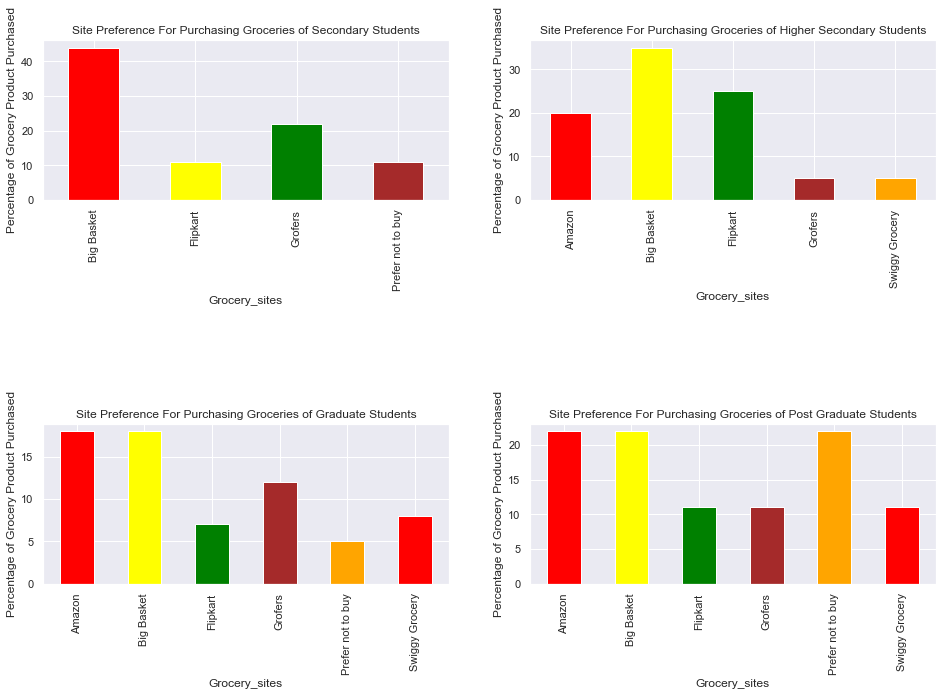

In [10]:
f = plt.figure()
plt.subplot(3,2,1)
Secondary.groupby(['Grocery_sites',])['Grocery_sites'].count().plot.bar(title="Site Preference For Purchasing Groceries of Secondary Students",
                                                                                 color = ("red", "yellow", "green","brown", "orange"),
                                                                            figsize = (16,10))
plt.ylabel("Percentage of Grocery Product Purchased")
plt.subplot(3,2,2)
Higher_Secondary.groupby(['Grocery_sites',])['Grocery_sites'].count().plot.bar(title="Site Preference For Purchasing Groceries of Higher Secondary Students",
                                                                                 color = ("red", "yellow", "green","brown", "orange"),
                                                                            figsize = (16,10))
plt.ylabel("Percentage of Grocery Product Purchased")


plt.subplot(3,2,5)
Graduate.groupby(['Grocery_sites'])['Grocery_sites'].count().plot.bar(title="Site Preference For Purchasing Groceries of Graduate Students",
                                                                                 color = ("red", "yellow", "green","brown", "orange"),
                                                                            figsize = (16,10))
plt.ylabel("Percentage of Grocery Product Purchased")


plt.subplot(3,2,6)
Post_Graduate_and_above.groupby(['Grocery_sites',])['Grocery_sites'].count().plot.bar(title="Site Preference For Purchasing Groceries of Post Graduate Students",
                                                                                 color = ("red", "yellow", "green","brown", "orange"),
                                                                            figsize = (16,10))
plt.ylabel("Percentage of Grocery Product Purchased")


f.savefig('3(b).png',facecolor='lightgrey',transparent=True)